In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import nltk
from collections import Counter
import string

In [323]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD


zsh:1: no matches found: https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD


In [2]:
ls

2017-capitalbikeshare-tripdata/
DS_coding_data.csv
Datafame_Indexing.html
Datafame_Indexing.ipynb
Dataframe selection.html
Dataframe_selection.html
Dataframe_selection_pandas.ipynb
Dataframe_transformation.html
Dataframe_transformation.ipynb
Dataset and other guides - - Please Download to Complete Assignment 2-20190709/
Documents.zip
Fremont_Bridge_Bicycle_Counter.csv
GOOG.csv
LearnBayes/
Lecture_1_pandas.html
Lecture_1_pandas.ipynb
Linear_Regression_workbook.ipynb
Logistic_Regression_Homework.ipynb
Logistic_Regression_Homework_Jupyter_notebook.ipynb
ML_textdata_workbook.ipynb
Materials used in lectures-20190708/
Natural Language Processing (2).ipynb
Natural Language Processing.ipynb
NeMo/
PycharmProjects/
Sequence-Models/
Starbucks-Common/
Starbucks-Common-latest.tar.gz
Starbucks-Common-latest.zip
Starbucks-Common.tar.gz
Summarizing_data_pandas.html
Summarizing_data_pandas.ipynb
Test_optimization_script.ipynb
Untitled Folder/
Untitled.ipynb
Untitled1.ipynb
airbnb.ipynb
airflow/
algori

In [4]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [6]:
data.columns = ['Total','West', 'East']
data['Total'] = data.eval('West + East')

In [7]:
data.dropna().describe()

,Total,West,East
count,149414.000000,149414.000000,149414.000000
mean,109.612212,49.708488,59.903724
std,139.769975,64.325026,86.811525
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


In [10]:
data.index.dayofweek

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=149438)

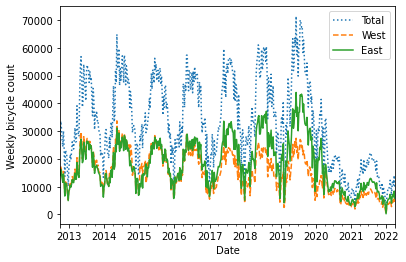

In [8]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

In [277]:
user_list = pd.read_csv("ml-100k/u.user",sep='|',encoding='ISO-8859-1',header=None)
user_list.columns = ["user_id", "age", "gender","occupation","zip_code"]
user_list.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [94]:
item_list = pd.read_csv("ml-100k/u.item",sep='|',encoding='ISO-8859-1',header=None)
item_list.columns = ["item_id", "movie_title","release_date", "video_release_date", 
                     "IMDb_URL", "unknown","Action", "Adventure", "Animation",
              "Children's", "Comedy", "Crime" , "Documentary", "Drama", "Fantasy","Film-Noir",
                     "Horror","Musical", "Mystery" ,"Romance", "Sci-Fi",
              "Thriller" ,"War", "Western"]
item_list.head()

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
# user item rating table
df = pd.read_csv("ml-100k/u.data",sep='\t',header=None)
df.columns = ['user_id','item_id','rating','timestamp']
df.drop(columns='timestamp',inplace=True)
df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [278]:
# Combine the data together
comb_df = df.merge(item_list,on=['item_id'],how='left')\
            .merge(user_list,on=['user_id'],how='left')

In [279]:
comb_df.head()

,user_id,item_id,rating,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,0,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,...,0,0,0,0,0,0,47,M,educator,55113


In [23]:
# Get unique user count
comb_df['user_id'].unique().shape, df['item_id'].unique().shape

((943,), (1682,))

<AxesSubplot:>

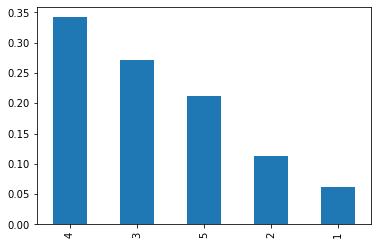

In [37]:
comb_df['rating'].value_counts(normalize=True).plot.bar()

- Most movies got a 4 rating

In [29]:
comb_df.groupby('user_id')['item_id'].count().describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: item_id, dtype: float64

<AxesSubplot:>

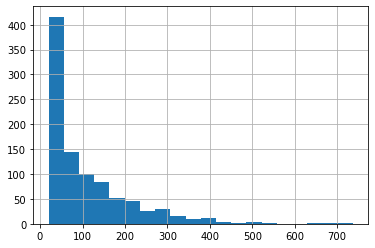

In [28]:
comb_df.groupby('user_id')['item_id'].count().hist(bins=20)

- half of the users rated at least 65 movies
- some power user rated over 700 movies
- Let's at things from the item perspectives

In [31]:
comb_df.groupby('item_id')['user_id'].count().describe()

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: user_id, dtype: float64

<AxesSubplot:>

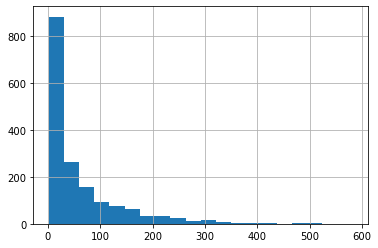

In [32]:
comb_df.groupby('item_id')['user_id'].count().hist(bins=20)

- Lot more sparsity on the item side
- need to think of the items with only single ratings

## Create user item count matrix
- create matrix of user and item where the element is the rating
- use pivot table
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [195]:
# create a movie index
movie_index = comb_df[['item_id','movie_title']].drop_duplicates().set_index('item_id')
movie_index.head()

,movie_title
item_id,
241,Kolya (1996)
301,L.A. Confidential (1997)
376,Heavyweights (1994)
50,Legends of the Fall (1994)
345,Jackie Brown (1997)


In [181]:
## first shift ids by 1
comb_df['item_id'] = comb_df['item_id'] -1
comb_df['user_id'] = comb_df['user_id'] -1

In [183]:
userItemMat = pd.pivot_table(comb_df, values='rating', index=['item_id'],columns=['user_id'])
print(userItemMat.values.shape)
userItemMat.head()


(1682, 943)


user_id,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
item_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
1,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Notice lots of nulls
- a user can't possible rate all the movies
- we will try to guess the rating for the missing values
- We'll use the neighbourhood approach
- k nearest neighbors uses distance matrix to find the nearest neighbors for each item
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors


In [77]:
from sklearn.neighbors import NearestNeighbors

In [271]:
# We need to fill the nulls in order to use the algorithm
dummy_mat = userItemMat.fillna(0)

In [188]:
knn = NearestNeighbors(metric='cosine', n_neighbors=10)
knn.fit(dummy_mat)
distances, indices = knn.kneighbors(dummy_mat)

- The cosine similarity scores of every movie against all other movies are in the distances
- indices contains the 10 nearest movies for each movie

In [194]:
# each row are the distance numbers for each movie
# 0 value is the distance of the movie against itself
distances[:2]

array([[0.        , 0.26542794, 0.30007503, 0.3102144 , 0.33544521,
        0.35867824, 0.36184237, 0.36327269, 0.36939924, 0.3759253 ],
       [0.        , 0.34038138, 0.37645642, 0.38272632, 0.38385688,
        0.39503096, 0.39804046, 0.40291733, 0.40431554, 0.40987649]])

In [192]:
# each row is the 10 movies that most similar for that movie
# note the first column. The most similar movie is the movie itself.  
# We'll have to omit the first column
indices[:10]

array([[   0,   49,  180,  120,  116,  404,  150,  221,   99,  236],
       [   1,  232,  160,  384,  402,   61,  575,  225,  230,  549],
       [   2,  409,  762,   41,   32,  249,   16, 1046,  824,  474],
       [   3,   55,  203,  173,  201,   95,  194,  171,  215,   78],
       [   4,  217,  218,   53,  233,   52,   97,  671,  199,  664],
       [   5, 1369, 1128, 1195,  220, 1201,  765,  546,   12, 1552],
       [   6,   99,   49,  116,   55,  180,    0,  120,  150,  404],
       [   7,  203,  173,  422,  171,  172,   68,   70,   78,  167],
       [   8,   99,  275,  126,    6,  236,  507,   49,  123,    0],
       [   9,  189,   19,  581,   51,  712,   82,  274,  123,   99]])

In [202]:
movie_index.loc[0]

movie_title    Toy Story (1995)
Name: 0, dtype: object

## let's find the movies most similar to toy story

In [203]:
# Get most similar movie with id = 0
indices_near_movies = indices[0]
movies_indices = movie_index.loc[indices_near_movies]['movie_title'].tolist()
print(indices_near_movies, movies_indices)

[  0  49 180 120 116 404 150 221  99 236] ['Toy Story (1995)', 'Star Wars (1977)', 'Return of the Jedi (1983)', 'Independence Day (ID4) (1996)', 'Rock, The (1996)', 'Mission: Impossible (1996)', 'Willy Wonka and the Chocolate Factory (1971)', 'Star Trek: First Contact (1996)', 'Fargo (1996)', 'Jerry Maguire (1996)']


## Note that Toy story appears in its neighbors. 
- we will have to fix that. 
- Anyway, lets see all the users who did not rate toy story

In [208]:
userItemMat.loc[0] # all the user ratings
userItemMat.loc[0][userItemMat.loc[0].isna()] # all the users with null ratings

user_id
2     NaN
3     NaN
6     NaN
7     NaN
8     NaN
       ..
936   NaN
938   NaN
939   NaN
941   NaN
942   NaN
Name: 0, Length: 491, dtype: float64

## Lets impute a rating for user 6
- restrict the user-item matrix to `user 6` and movie neigbours of toy story

In [213]:
## movies similar to toy story, but only for user 6
indices_nearest = indices[0][1:] # indices of the movies nearest to 0 (toy story) omit the first element
userItemMat.loc[indices_nearest][6] # ratings matrix for user 6 and movies in neighbors


item_id
49     5.0
180    3.0
120    5.0
116    NaN
404    3.0
150    4.0
221    NaN
99     5.0
236    5.0
Name: 6, dtype: float64

- see that multiple  movies were rated by the user. 
- Let's use  the top 2 movies 49, and 180 to impute ratings for `movie 0`
- Use the weighted average of the ratings, using the similarity scores for weights
- imputed rating = (sim(0,49)\*rts(6,49) + sim(0,180)\*rts(6,180)) / (sim(0,49) + sim(0,180))
- the similarity scores will come from the distance matrix
             


In [249]:
ratings = userItemMat.loc[indices_nearest][6]
ratings.name = 'ratings' ## changing series name
mini_df =pd.DataFrame(ratings)
mini_df['similarities'] = distances[0][1:]  ## omitting the first column
mini_df['weighted_ratings'] = mini_df['ratings']*mini_df['similarities']

mini_df

,ratings,similarities,weighted_ratings
item_id,,,
49,5.0,0.265428,1.327140
180,3.0,0.300075,0.900225
120,5.0,0.310214,1.551072
116,NaN,0.335445,NaN
404,3.0,0.358678,1.076035
150,4.0,0.361842,1.447369
221,NaN,0.363273,NaN
99,5.0,0.369399,1.846996
236,5.0,0.375925,1.879626


In [248]:
imputed_rating = mini_df['weighted_ratings'].sum()/mini_df['similarities'].sum()

3.298532473849477

## Putting everything together

In [266]:
def rating(user,movie):
    print("movie of given index", movie_index.loc[movie])
    if ~np.isnan(userItemMat.loc[movie][user]):  #if rating already filled in, return the rating
        print("rating already filled in")
        return userItemMat.loc[movie][user]
    else:
        indices_nearest = indices[movie][1:]
        ratings = userItemMat.loc[indices_nearest][user]
        ratings.name = 'ratings' ## changing series name
        mini_df =pd.DataFrame(ratings)
        mini_df['similarities'] = distances[0][1:]  ## omitting the first column
        mini_df['weighted_ratings'] = mini_df['ratings']*mini_df['similarities']
        imputed_rating = mini_df['weighted_ratings'].sum()/mini_df['similarities'].sum()
        print(mini_df)
        return imputed_rating
        
    
        

In [270]:
rating(5,100)

movie of given index movie_title    Heavy Metal (1981)
Name: 100, dtype: object
         ratings  similarities  weighted_ratings
item_id                                         
430          NaN      0.265428               NaN
379          NaN      0.300075               NaN
216          NaN      0.310214               NaN
227          NaN      0.335445               NaN
90           NaN      0.358678               NaN
231          NaN      0.361842               NaN
226          NaN      0.363273               NaN
228          NaN      0.369399               NaN
79           NaN      0.375925               NaN


0.0

## The rating is zero because the user did not have ratings for any similar movies
- how do we mitigate this?
- How do we work with users that have no movie ratings?

In [269]:
rating(7,100)

movie of given index movie_title    Heavy Metal (1981)
Name: 100, dtype: object
         ratings  similarities  weighted_ratings
item_id                                         
430          2.0      0.265428          0.530856
379          NaN      0.300075               NaN
216          NaN      0.310214               NaN
227          5.0      0.335445          1.677226
90           NaN      0.358678               NaN
231          NaN      0.361842               NaN
226          4.0      0.363273          1.453091
228          5.0      0.369399          1.846996
79           NaN      0.375925               NaN


1.8117305448185723

## Content Based Recommendation
- we could use the movie features to find the most similar movies
- advantages we don't need user data to make recommendations
- the recommendation is only as good as the movie feature set, Doesn't take into account user preferences

In [313]:
movie_mat.sort_values('item_id').reset_index()

,index,item_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,24,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,172,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,302,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,48,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,78,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,75323,1678,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,67302,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,80394,1680,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,92329,1681,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [314]:
movie_features = ['Action', 'Adventure',
       'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']

movie_mat = comb_df[['item_id']+movie_features].drop_duplicates()\
            .sort_values('item_id').reset_index()  
#need to reset index to make sure row index and movie index lines up

movie_mat.head()

,index,item_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,24,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,172,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,302,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,48,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,78,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [315]:
knn = NearestNeighbors(metric='jaccard', n_neighbors=10)
knn.fit(movie_mat.drop(columns=['item_id']))
distances, indices = knn.kneighbors(movie_mat.drop(columns=['item_id']))

/Users/dami.osoba/opt/anaconda3/envs/tf_latest/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [321]:
dummy_mat.mean(axis=0)

user_id
0      0.583829
1      0.136742
2      0.089774
3      0.061831
4      0.299049
         ...   
938    0.124257
939    0.219976
940    0.052913
941    0.200357
942    0.340666
Length: 943, dtype: float64

In [316]:
# Now lets look at the top ten movies closest to top story
movie_index.loc[indices[0]]

,movie_title
item_id,
421,Aladdin and the King of Thieves (1996)
0,Toy Story (1995)
1218,"Goofy Movie, A (1995)"
94,Aladdin (1992)
224,101 Dalmatians (1996)
242,Jungle2Jungle (1997)
622,Angels in the Outfield (1994)
188,"Grand Day Out, A (1992)"
260,Air Bud (1997)
